In [2]:
from matplotlib import use
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
data = pd.read_csv('ex2data1.txt',names=['exam1_score','exam2_score','admission_status'])
data.head()

,exam1_score,exam2_score,admission_status
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [4]:
get = data.loc[data['admission_status'] == 1]
notget = data.loc[data['admission_status'] == 0]

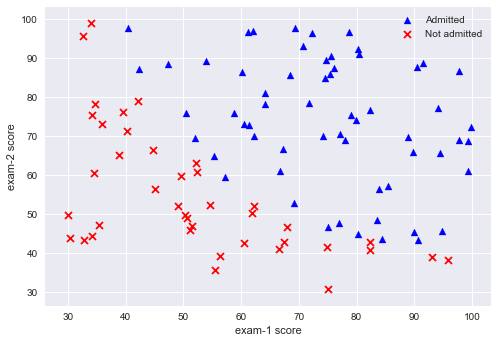

In [5]:
# visalisation

plt.scatter(get['exam1_score'], get['exam2_score'], color='b', marker='^',label='Admitted')
plt.scatter(notget['exam1_score'], notget['exam2_score'], color='r',marker='x',label='Not admitted')
plt.xlabel('exam-1 score')
plt.ylabel('exam-2 score')
plt.legend()
plt.show()

#### Sigmoid function
$$ g(z)=\frac{1}{1+e^{−z}} $$

In [6]:
def sigmoid(z):
    g = 1 / (1 + np.exp(-z))
    return g

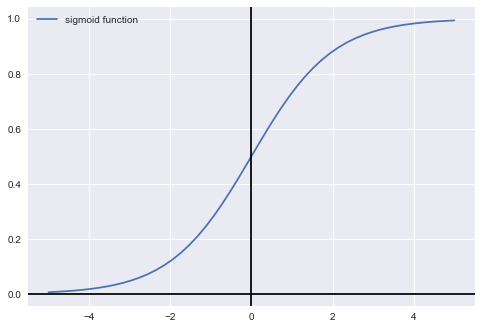

In [7]:
x_ = np.linspace(-5,5) 
plt.plot(x_,sigmoid(x_),label='sigmoid function')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.legend()
plt.show()

In [8]:
x = data.as_matrix(['exam1_score','exam2_score'])
y = data.as_matrix(['admission_status'])
m,n = x.shape

In [9]:
# initialize parameters

initial_theta = np.zeros(n+1)
X = np.concatenate((np.ones((m,1)),x),axis=1)
print "X shape : ",X.shape
print "y shape : ",y.shape
print "theta shape : ",initial_theta.shape
y[:5]

X shape :  (100, 3)
y shape :  (100, 1)
theta shape :  (3,)


array([[0],
       [0],
       [0],
       [1],
       [1]])

In [10]:
def costFunction(theta,X,y):
    
    y = np.squeeze(y)
    h = sigmoid(np.dot(X,theta.T))
    a = np.multiply(y,np.log(h))
    b = (1-y) * (np.log(1-h))
    J =  (a+b).sum() / -m
    return J

In [11]:
print "initial cost :",costFunction(initial_theta,X,y)

initial cost : 0.69314718056


In [12]:
def gradientFunction(theta,X,y):
    m = len(y)
    y = np.squeeze(y)
    h = sigmoid(np.dot(X,theta))
    grad = (1. / m) * np.dot((X.T),(h-y))
    return grad

In [13]:
print "initial grad : ",gradientFunction(initial_theta,X,y)

initial grad :  [ -0.1        -12.00921659 -11.26284221]


In [14]:
res = minimize(costFunction, initial_theta, args=(X,y), method='TNC', jac=gradientFunction, options={'maxiter':1000})

theta = res.x
loss = res.fun

In [15]:
print theta
print loss

[-25.1613186    0.20623159   0.20147149]
0.203497701589


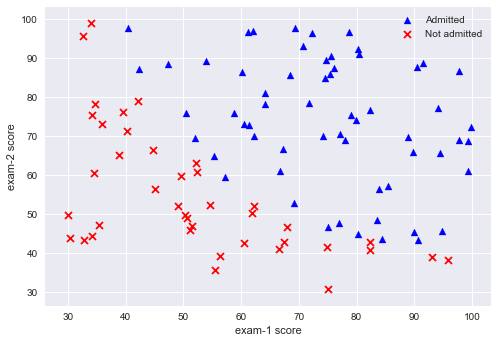

In [16]:
# visalisation

plt.scatter(get['exam1_score'], get['exam2_score'], color='b', marker='^',label='Admitted')
plt.scatter(notget['exam1_score'], notget['exam2_score'], color='r',marker='x',label='Not admitted')
plt.xlabel('exam-1 score')
plt.ylabel('exam-2 score')
plt.legend()
plt.show()

In [17]:
def predict(theta,X):
    (m,n) = X.shape
    p = np.zeros((m,1))
    p = sigmoid(np.dot(X,theta))
    return [1 if x >= 0.5 else 0 for x in p]

In [18]:
prob =  sigmoid(np.array([1, 45, 85]).dot(theta))
print 'For a student with scores 45 and 85, we predict an admission probability of %f .' % prob

p = predict(theta,X)
y = np.squeeze(y)
acc = 1.0 * np.where(p == y)[0].size/len(p) * 100
print "Accuracy on the dataset : " ,acc

For a student with scores 45 and 85, we predict an admission probability of 0.776291 .
Accuracy on the dataset :  89.0


# Regularization

In [27]:
df = pd.read_csv('ex2data2.txt',names=['test1','test2','accepted_status'])
df.head()

,test1,test2,accepted_status
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [28]:
accepted = df.loc[df['accepted_status'] == 1]
rejected = df.loc[df['accepted_status'] == 0]

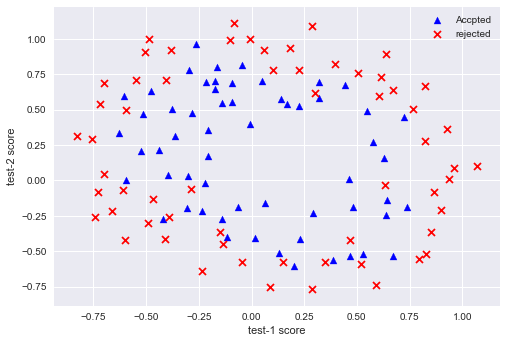

In [29]:
# visalisation

plt.scatter(accepted['test1'], accepted['test2'], color='b', marker='^',label='Accpted')
plt.scatter(rejected['test1'], rejected['test2'], color='r',marker='x',label='rejected')
plt.xlabel('test-1 score')
plt.ylabel('test-2 score')
plt.legend()
plt.show()

In [30]:
# initialize parameters
x = df.as_matrix(['test2','test2'])
y = df.as_matrix(['accepted_status'])

m,n = x.shape

initial_theta = np.zeros((m,1))
Lambda = 1.0

In [35]:
def costFunctionReg(theta,X,y,Lambda):
    m =len(y)
    th = theta[1:]
    J = costFunction(theta) + (Lambda / (2 * m)) * (np.sum(np.square(th)))
    return J 

In [36]:
def gradientFunctionReg(theta,X,y,Lambda):
    m = len(y)
    grad_no_regulation = gradientFunction(theta,X,y)
    grad = gradientFunction(theta,X,y) + (Lambda / m) * theta
    grad[0] = grad_no_regulation[0]
    return grad

In [37]:
def optimize(Lambda):
    result = minimize(costFunctionReg,initial_theta,
                       method='TNC', jac=gradientFunctionReg, options={'maxiter':1000})

In [50]:
X1 = df['test1']
X2 = df['test2']

In [51]:
def map_feature(X1, X2, degree=6):
    m = X1.shape[0] if X1.shape else 1
    cols = [np.ones(m)]
    for i in range(1, degree + 1):
        for j in range(i + 1):
            cols.append((X1 ** (i - j)) * (X2 ** j))
    return np.vstack(cols).T